In [16]:
%matplotlib inline

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import statsmodels.api as sm

# 1. Import data

In [18]:
# 1.1. Read data from CSV
in_filepath = 'data.txt'
pd.set_option('precision', 0)
df=pd.read_csv(in_filepath, names=['ts','energy'])

In [19]:
print (df.shape)

(2676545, 2)


In [20]:
print (df.dtypes)

ts        int64
energy    int64
dtype: object


# 2. Normalize data 

In [21]:
df['ts'] = pd.to_datetime(df['ts'],unit='s')

In [22]:
df.head(5)

,ts,energy
0,2011-08-01 07:00:00,1322
1,2011-08-01 07:00:01,1322
2,2011-08-01 07:00:02,1328
3,2011-08-01 07:00:03,1328
4,2011-08-01 07:00:04,1328


In [23]:
print (df.dtypes)

ts        datetime64[ns]
energy             int64
dtype: object


In [24]:
df.index = df['ts']

# 3. Plot Multiple Seasonalities 

In [25]:
df2nd=df.loc['2011-08-12':'2011-09-01']['energy']

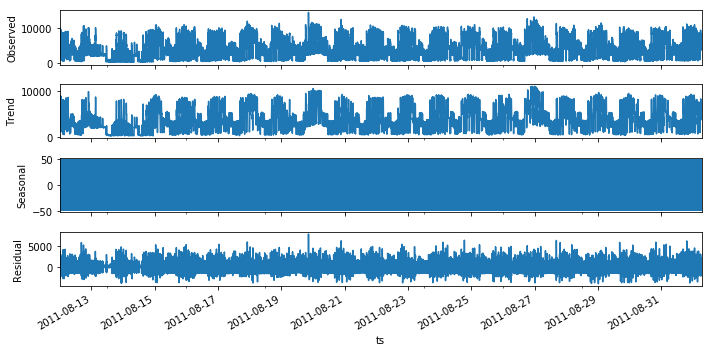

In [26]:
decompfreq_ac1_10m = 10*60
res_ac1 = sm.tsa.seasonal_decompose(df2nd,
 freq=decompfreq_ac1_10m,
 model='additive')
fig = res_ac1.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

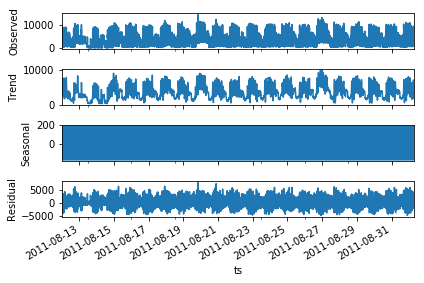

In [27]:
decompfreq_ac2_30m = 30*60
res_ac2 = sm.tsa.seasonal_decompose(df2nd,
 freq=decompfreq_ac2_30m,
 model='additive')
resplot = res_ac2.plot()

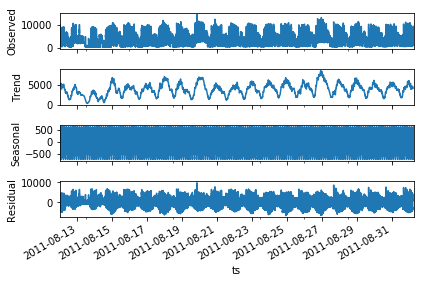

In [28]:
decompfreq_pool_3h = 3*60*60
res_pool = sm.tsa.seasonal_decompose(df2nd,
 freq=decompfreq_pool_3h,
 model='additive')
resplot = res_pool.plot()

# 4. Difference Transform To Remove Seasonalities 

In [29]:
adjusted = df2nd - res_ac1.seasonal - res_ac2.seasonal - res_pool.seasonal

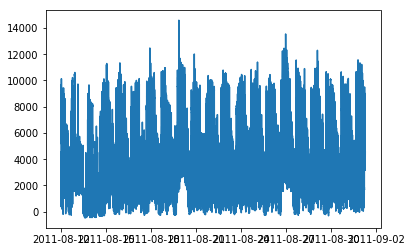

In [30]:
plt.plot(adjusted)